# SOK-1006 V25
## Arbeidskrav 7 - Detaljhandel i Norge: Estimering av en tilbudsfunksjon

Tilpasset fra mappeoppgave 2 v24.



## Bakgrunn

I arbiedskrav 6 har dere estimert en produktfunksjon for detaljhandel i Norge basert på data i 2022. Nå skal disse resultatene brukes til å estimere en tilbudsfunksjon for en bedrift i denne bransjen. (Dersom du ikke gjorde arbeidskrav 6, kan du bruke egne tall for Z, a, b. Pass på at $a+b \leq 1$.)

### Oppgave - Tilbud til en gjennomsnittlig bedrift


Butikken "Helt midt på treet" er en ganske *gjennomsnittlig* bedrift i en bransje i detaljhandelen. I denne sammenhengen betyr gjennomsnittlig følgende:       

- $Z, a, b$ som du fant i arbeidskrav 6 beskriver produktfunksjonen til bedriften.
- Én timeslønn i denne bedriften tilsvarer gjennomsnittet for detaljhandelen.
- På kort sikt har bedriften kapitalutgifter som tilsvarer gjennomsnittet for detaljhandelen.

I praksis betyr dette at du kan bruke dine estimat på $Z, a, b$ (ta 2 desimalplasser) som bedriftens produktfunksjon i (1), at timelønna er 287 kr i 2022, og at kapitalutgiften er gjennomsnittet av det som du har i datasettet (som du må finne). (Tabell 11421, SSB gir gjennomsnittlig månedslønn i 2022 for en ansatt i gruppe 47 Detaljhandel som 41 290 kr. SSB sier videre at en ansatt i full stilling arbeider 230 dager i året, som utgjør 19.2 dager i snitt pr måned, eller (19.2*7.5=) 144 timer pr måned).          

Vi går ut fra at "Helt midt på treet" har følgende produktfunksjon:


\begin{equation}
   y = ZL^aK_0^{b}\;\;(2)
\end{equation}

Her er $y$ *antall enheter produsert*, $L$ *antall timer arbeidskraft*, mens $K_0$ er kapitalutgiften til bedriften i mill. NOK. (Legg merke til at vi nå blander fysiske og monetære enheter).          

i) Skriv et uttrykk for bedriftens variable kostnader og totale kostnader på kort sikt som en funksjon av mengde produsert ($y$). (Som vi har sett før har Sympy problemer med å løse ligninger av formen $Y=\alpha X^\beta$ for $X$. Dette kan vi løse selv som $X=(\frac{Y}{\alpha})^{\frac{1}{\beta}}$).       

ii) Finn uttrykk for bedriftens grensekostnad og gjennomsnittskostnad (total og variabel).        

iii) Bruk ditt svar til ii) for å tegne bedriftens tilbudskurve i en figur. Forklar figuren nøye.        

iv) Anta at lønnsoppgjøret gir arbeidere i "Helt midt på treet" en lønnsøkning på 5%. Vis hvordan dette påvirker bedriftens tilbud, og forklar intuisjonen bak endringen.



In [3]:
# Laster inn dataene fra forrige arbeidskrav

# last inn pakker

import json
import pandas as pd
import requests
from pyjstat import pyjstat
import numpy as np
import sympy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/12910/"

# spørring fra SSB

apiQuery = {
  "query": [
    {
      "code": "NACE2007",
      "selection": {
        "filter": "vs:NACE2007StrNaringUndGr",
        "values": [
          "47.111",
          "47.112",
          "47.190",
          "47.210",
          "47.220",
          "47.230",
          "47.241",
          "47.242",
          "47.251",
          "47.259",
          "47.260",
          "47.291",
          "47.292",
          "47.299",
          "47.300",
          "47.410",
          "47.420",
          "47.430",
          "47.510",
          "47.521",
          "47.522",
          "47.523",
          "47.524",
          "47.529",
          "47.531",
          "47.532",
          "47.533",
          "47.540",
          "47.591",
          "47.592",
          "47.593",
          "47.594",
          "47.599",
          "47.610",
          "47.620",
          "47.630",
          "47.641",
          "47.642",
          "47.650",
          "47.710",
          "47.721",
          "47.722",
          "47.730",
          "47.740",
          "47.750",
          "47.761",
          "47.762",
          "47.771",
          "47.772",
          "47.781",
          "47.782",
          "47.789",
          "47.791",
          "47.792",
          "47.799",
          "47.810",
          "47.820",
          "47.890",
          "47.911",
          "47.912",
          "47.913",
          "47.914",
          "47.915",
          "47.916",
          "47.917",
          "47.919",
          "47.990"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Produksjonsverdi",
          "Lonnskost",
          "BruttoInvesteringer"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


# Funksjon for å konvertere uttrekket til 2 dataframes, tar 2 paramtre (SSB)

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df



,næring (SN2007),foretak/bedrift,statistikkvariabel,år,value
0,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Produksjonsverdi (mill. kr),2022,52149.6
1,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,22215.3
2,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,3807.0
3,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,49435.7
4,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,21116.2
...,...,...,...,...,...
397,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,532.4
398,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,83.3
399,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,1611.6
400,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,532.0


In [4]:
# Laster inn data fra forrive arbeidskrav

# slå sammen verdier for foretak og bedrift

df_sum = df.groupby(['næring (SN2007)', 'statistikkvariabel']).sum().reset_index()

# dropp kolonner

df_sum = df_sum.drop(columns=['foretak/bedrift', 'år'])

# pivot

df_pivot = df_sum.pivot_table(index='næring (SN2007)', columns='statistikkvariabel', values='value')

# lag en kopi av datasettet

data = df_pivot.copy()

# fjern rader med verdier lik 0

data = data.drop(data[data.eq(0).any(axis=1)].index)

#vis datasettet

data

statistikkvariabel,Bruttoinvesteringer (mill. kr),Lønnskostnader (mill. kr),Produksjonsverdi (mill. kr)
næring (SN2007),,,
Butikkhandel ikke nevnt annet sted,189.3,2331.1,5892.0
Butikkhandel med antikviteter,0.1,30.4,110.1
Butikkhandel med apotekvarer,311.9,10713.4,18990.5
Butikkhandel med audio- og videoutstyr,31.6,398.8,848.6
Butikkhandel med bakervarer og konditorvarer,62.2,1282.5,2792.3
...,...,...,...
Postordre-/Internetthandel med helsekost,12.2,248.1,2111.4
"Postordre-/Internetthandel med tekstiler, utstyrsvarer, klær, skotøy, reiseeffekter og lærvarer",109.4,1137.9,6152.3
"Postordre-/internetthandel med bøker, papir, aviser og blader",6.1,114.6,483.2


In [5]:
# i)

# Allerede estimerte verdier, rundet til to desimaler
Z = round(4.872718672080014, 2)
a = round(0.8087532932532765, 2)
b = round(0.15125109895927732, 2)

# Finner gjennomsnittlig bruttoinvesteringer, bruttoinvesteringer fra forrige oppgave = kapitalutgifter
K0 = data["Bruttoinvesteringer (mill. kr)"].mean()
# Gjennomsnittlig timelønn gitt i oppgaven       
timelønn = 287 

# Funksjon for å beregne nødvendig arbeidskraft L for å produsere y enheter
def finn_L(y, Z, a, b, K0):
    return (y / (Z * (K0 ** b))) ** (1 / a)

# Funksjon for å beregne variable kostnader
def variable_kostnader(y, Z, a, b, K0, timelønn):
    L = finn_L(y, Z, a, b, K0)
    return L * timelønn

# Funksjon for totale kostnader (kort sikt)
def totale_kostnader(y, Z, a, b, K0, timelønn):
    VC = variable_kostnader(y, Z, a, b, K0, timelønn)
    # Må gange med en million siden det før har vært forkortet så må sørge for riktig utregning
    faste_kostnader = K0 * 1_000_000 
    return VC + faste_kostnader

# Eksempel: beregn for 1000 produserte enheter
y = 1000
VC = variable_kostnader(y, Z, a, b, K0, timelønn)
TC = totale_kostnader(y, Z, a, b, K0, timelønn)

print(f"Variable kostnader for {y} enheter: {VC:.2f} kr")
print(f"Totale kostnader for {y} enheter: {TC:.2f} kr")

Variable kostnader for 1000 enheter: 72803.68 kr
Totale kostnader for 1000 enheter: 271346574.17 kr


In [7]:
# ii)

# Variabel kostnad
def VC(y):
    return timelønn * (y / (Z * K0**b))**(1 / a)

# Grensekostnad
def MC(y):
    return timelønn * (1 / a) * (1 / (Z * K0**b))**(1 / a) * y**((1 / a) - 1)

# Gjennomsnittlig variabel kostnad
def AVC(y):
    return VC(y) / y

# Faste kostnader
# Ganges med en million for at utregningen skal bli riktig siden K0 er oppgitt som tall(mill. NOK)
def FC():
    return K0 * 1_000_000

# Totale kostnader
def TC(y):
    return VC(y) + FC()

# Gjennomsnittlige totale kostnader
def ATC(y):
    return TC(y) / y

# Hvis vi produserer 1000 enheter
y = 1000

# Beregninger, kaller på funksjonene og lagrer resultatet
mc = MC(y)
avc = AVC(y)
atc = ATC(y)

# Utskrift av resultatene
print(f"Grensekostnad (MC) for {y} enheter: {mc:.2f} kr")
print(f"Gjennomsnittlig variable kostnad (AVC) for {y} enheter: {avc:.2f} kr")
print(f"Gjennomsnittlig total kostnad (ATC) for {y} enheter: {atc:.2f} kr")


Grensekostnad (MC) for 1000 enheter: 89.88 kr
Gjennomsnittlig variable kostnad (AVC) for 1000 enheter: 72.80 kr
Gjennomsnittlig total kostnad (ATC) for 1000 enheter: 271346.57 kr


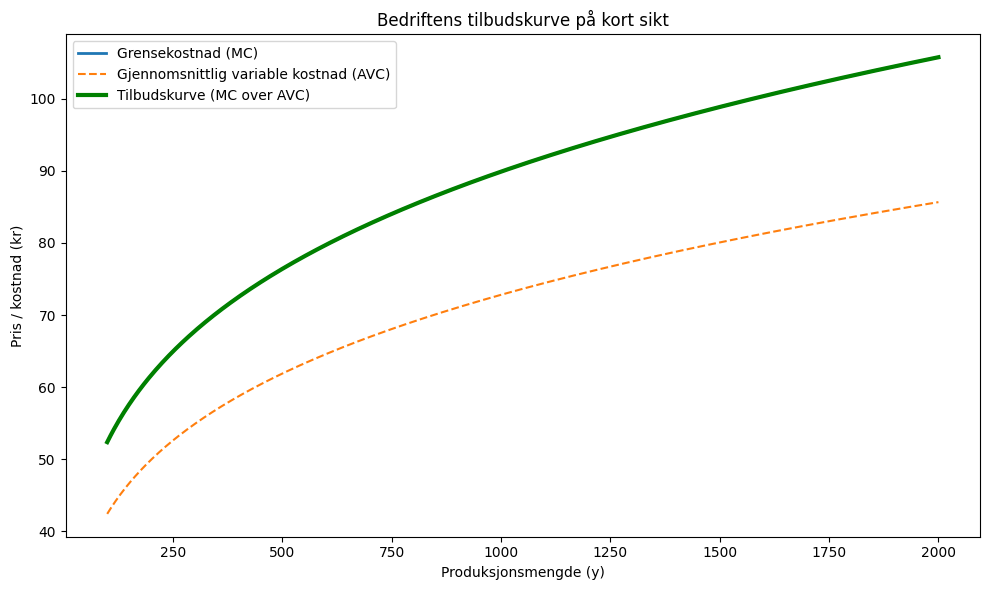

In [12]:
# iii)

# Verdier for y
y = np.linspace(100, 2000, 500)

# Verdier for MC (grensekostnad) og AVC (gjennomsnittlig total kostnad)
mc_vals = MC(y)
avc_vals = AVC(y)

# Tilbudskurve: bare der MC >= AVC
tilbud_y = y[mc_vals >= avc_vals]
tilbud_mc = mc_vals[mc_vals >= avc_vals]

# Plotter figuren
plt.figure(figsize=(10, 6))
plt.plot(y, mc_vals, label='Grensekostnad (MC)', linewidth=2)
plt.plot(y, avc_vals, label='Gjennomsnittlig variable kostnad (AVC)', linestyle='--')
plt.plot(tilbud_y, tilbud_mc, label='Tilbudskurve (MC over AVC)', color='green', linewidth=3)
plt.xlabel("Produksjonsmengde (y)")
plt.ylabel("Pris / kostnad (kr)")
plt.title("Bedriftens tilbudskurve på kort sikt")
plt.legend()
plt.tight_layout()
plt.show()

Forklaring av figuren

Figuren viser bedriften "Helt midt på treet" sin tilbudskurve på kort sikt. Den oransje stiplede linjen viser gjennomsnittlige variable kostnader og den grønne viser tilbudskurven. For denne figuren er det antatt at bedriften oprerer under perfekt konkurranse og i perfekt konkurranse vil en bedrift kun tilby varer dersom markedsprisen er høy nok til å dekke de variable kostnadene, altså der MC ≥ AVC. Tilbudskurven bli da den delen av mc-kurven som ligger over avc-kurven. Dette er bedriftens faktiske tilbud: hvor mye den er villig til å produsere til ulike priser.

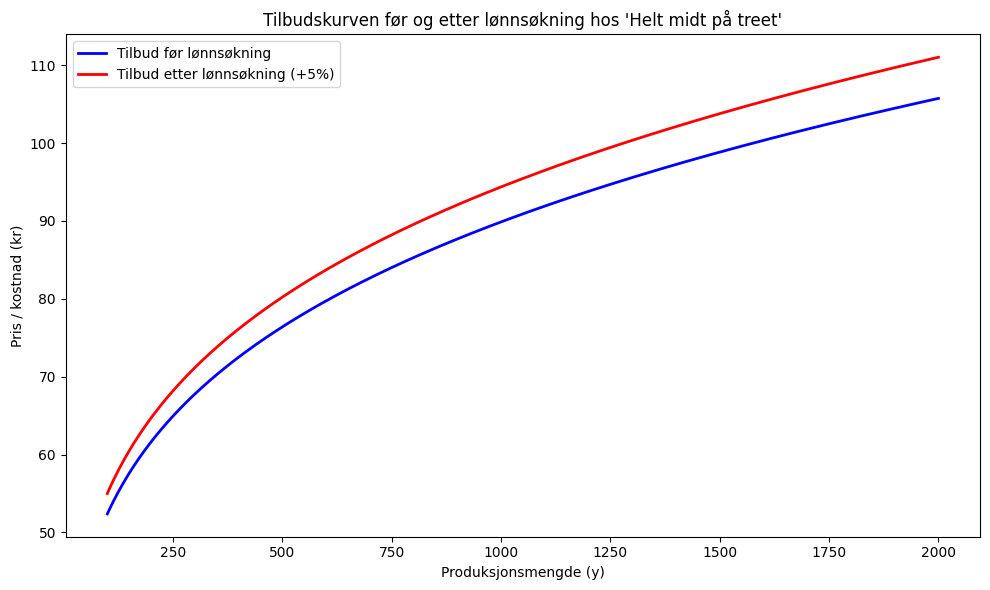

In [16]:
# iv)

# Nye parametere
timelønn_opprinnelig = 287
timelønn_ny = timelønn_opprinnelig * 1.05

# Kostnadsfunksjoner
def MC(y, timelønn):
    return timelønn * (1 / a) * (1 / (Z * K0**b))**(1 / a) * y**((1 / a) - 1)

def AVC(y, timelønn):
    VC = timelønn * (y / (Z * K0**b))**(1 / a)
    return VC / y

# Verdier for produksjonsmengde
y = np.linspace(100, 2000, 500)

# Kostnadsverdier før og etter lønnsøkning
mc_før = MC(y, timelønn_opprinnelig)
mc_etter = MC(y, timelønn_ny)
avc_før = AVC(y, timelønn_opprinnelig)
avc_etter = AVC(y, timelønn_ny)

# Tilbudskurver = deler av MC over AVC
tilbud_y_før = y[mc_før >= avc_før]
tilbud_mc_før = mc_før[mc_før >= avc_før]

tilbud_y_etter = y[mc_etter >= avc_etter]
tilbud_mc_etter = mc_etter[mc_etter >= avc_etter]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tilbud_y_før, tilbud_mc_før, label='Tilbud før lønnsøkning', linewidth=2, color='blue')
plt.plot(tilbud_y_etter, tilbud_mc_etter, label='Tilbud etter lønnsøkning (+5%)', linewidth=2, color='red')
plt.xlabel("Produksjonsmengde (y)")
plt.ylabel("Pris / kostnad (kr)")
plt.title("Tilbudskurven før og etter lønnsøkning hos 'Helt midt på treet'")
plt.legend()
plt.tight_layout()
plt.show()

Intuisjonen bak endringene

Lønna øker -> arbeidskraft blir dyrere -> proukksjonen blir dyrere -> bedriften øker prisene sine

Det gjør at grensekostnadene blir høyere, og gjennomsnittlig variable kostnader blir høyere. Dermed vil den nye tilbudskurven legge seg over den opprinnelige. 